In [400]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.neighbors as skn

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

In [402]:
def drop_data(df):
  df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
  return df

In [403]:
def normalize_data(df):
  normalize_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
  for col in normalize_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
  return df

In [404]:
def process_data(df):
  df['Age'] = df['Age'].fillna(df['Age'].mean())
  df['Embarked'] = df['Embarked'].fillna('S')
  df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

  df['Sex'] = df['Sex'].map(df['Sex'].value_counts())
  df['Embarked'] = df['Embarked'].map(df['Embarked'].value_counts())

  df = normalize_data(df)
  # df = df.sample(frac=1)
  return df

In [405]:
df = pd.read_csv('data/train.csv')
df = drop_data(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [406]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [407]:
df['Age'] = df['Age'].round(-1)
df['Fare'] = df['Fare'] * 2
df['Fare'] = df['Fare'].round(-2)
df['Fare'] = df['Fare'] / 2
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,20.0,1,0,0.0,S
1,1,1,female,40.0,1,0,50.0,C
2,1,3,female,30.0,0,0,0.0,S
3,1,1,female,40.0,1,0,50.0,S
4,0,3,male,40.0,0,0,0.0,S


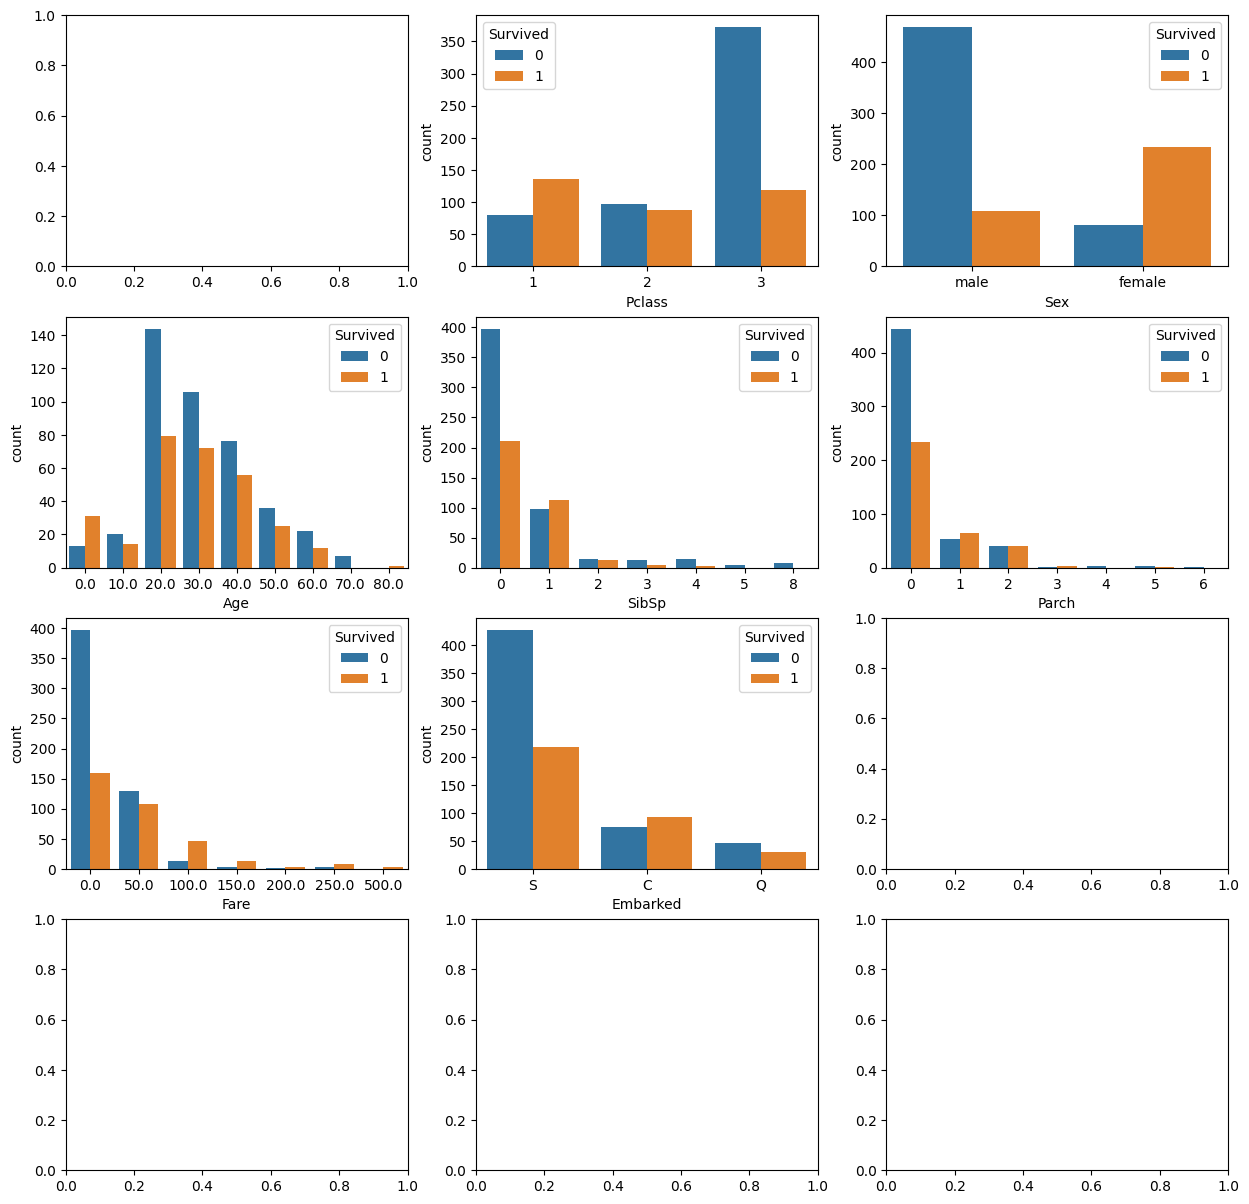

In [408]:
f, axes = plt.subplots(4, 3, figsize=(15, 15))
for idx, col in enumerate(df.columns):
  if col == 'Survived':
    continue
  sns.countplot(x=col, data=df, hue='Survived', ax=axes[idx // 3, idx % 3])

In [32]:
df = process_data(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
890,0,0.826913,0.737281,0.176964,-0.474279,-0.473408,-0.492101,-1.889562
159,0,0.826913,0.737281,0.000000,6.780355,2.007806,0.751524,0.612562
205,0,0.826913,-1.354813,-2.130371,-0.474279,0.767199,-0.437517,0.612562
815,0,-1.565228,0.737281,0.000000,-0.474279,-0.473408,-0.648058,0.612562
0,0,0.826913,0.737281,-0.592148,0.432550,-0.473408,-0.502163,0.612562


In [33]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,-7.974666e-17,-6.379733e-17,2.252843e-16,3.538758e-17,2.392400e-17,-1.794300e-17,1.794300e-16
std,0.486592,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.565228e+00,-1.354813e+00,-2.251891e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,-1.889562e+00
25%,0.000000,-3.691575e-01,-1.354813e+00,-5.921480e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,-1.489398e+00
50%,0.000000,8.269128e-01,7.372810e-01,0.000000e+00,-4.742788e-01,-4.734077e-01,-3.571902e-01,6.125622e-01
75%,1.000000,8.269128e-01,7.372810e-01,4.076970e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,6.125622e-01
max,1.000000,8.269128e-01,7.372810e-01,3.868699e+00,6.780355e+00,6.970233e+00,9.661740e+00,6.125622e-01


## model

In [34]:
model = skn.KNeighborsClassifier(n_neighbors=2)
history = model.fit(df.drop(['Survived'], axis=1), df['Survived'])

In [35]:
history.score(df.drop(['Survived'], axis=1), df['Survived'])

0.8843995510662177

In [36]:
test_df = pd.read_csv('data/test.csv')
processed_test_df = process_data(test_df)
processed_test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02
mean,-2.974760e-17,2.719781e-16,3.187243e-17,-1.699863e-17,-4.249658e-17,-2.124829e-17,-1.274897e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.503319e+00,-1.321292e+00,-2.382564e+00,-4.988722e-01,-3.997686e-01,-6.380170e-01,-1.757431e+00
25%,-1.503319e+00,-1.321292e+00,-5.756121e-01,-4.988722e-01,-3.997686e-01,-4.966178e-01,-1.135936e+00
50%,8.724364e-01,7.550242e-01,0.000000e+00,-4.988722e-01,-3.997686e-01,-3.791690e-01,7.285457e-01
75%,8.724364e-01,7.550242e-01,4.335268e-01,6.162539e-01,-3.997686e-01,-7.391031e-02,7.285457e-01
max,8.724364e-01,7.550242e-01,3.619240e+00,8.422137e+00,8.770534e+00,8.536851e+00,7.285457e-01


In [37]:
predictions = model.predict(processed_test_df)
predictions = np.round(predictions).astype(int).reshape(-1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [38]:
with open('output/submission.csv', 'w') as f:
  f.write('PassengerId,Survived\n')
  for row in zip(test_df['PassengerId'], predictions):
    f.write(f'{row[0]},{row[1]}\n')